In [127]:
from platform import python_version

print(python_version())

3.6.10


# <center>Credit Card Score Forecaster with Supervised Learning</center>
## <center> COMP 6111 </center>

### <center> Mehrnoosh AMJADI - (40091264) </center>
### <center> Somaye GHAHARI - (40106359)</center>             

The poitn of this Jupyter Notebook is to implement the final project, titled **"Credit Card Score Forecaster with Supervised Learning"**.

we propose a novel system that can predict the score of the credit cards of the customers in prior to issuing the card to see if clients would be able to pay their credit cards on time or not. We perform supervised learning methods on customers datasets and operate our analysis based on some powerful Machine Learning algorithms.

During all the phases, we utilize visualization to get a better sense of understanding.

### 1. phase1: 
#### Importing libraries

This section imports necessary libraries.

In [128]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import time
import datetime
import sklearn
import sklearn.preprocessing     # For StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.neural_network
import scipy
import scipy.stats 
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


warnings.filterwarnings('ignore')
%matplotlib inline
# sns.set_style('whitegrid')
np.set_printoptions(precision=3, suppress=True)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
sns.set(style='ticks', palette='Set2')

### 2. phase 2:
#### Loading datasets and Preprocessing  PHASE


##### 2.1: Loading application csv file, droping unecessary features "application_record.csv"
"application_record.csv" file is loaded and processed to convert to acceptable format. It includes application information of the costumers.

In [129]:
df_app = pd.read_csv("data/application_record.csv", dtype='unicode')

df_app.head(10)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [130]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   438557 non-null  object
 1   CODE_GENDER          438557 non-null  object
 2   FLAG_OWN_CAR         438557 non-null  object
 3   FLAG_OWN_REALTY      438557 non-null  object
 4   CNT_CHILDREN         438557 non-null  object
 5   AMT_INCOME_TOTAL     438557 non-null  object
 6   NAME_INCOME_TYPE     438557 non-null  object
 7   NAME_EDUCATION_TYPE  438557 non-null  object
 8   NAME_FAMILY_STATUS   438557 non-null  object
 9   NAME_HOUSING_TYPE    438557 non-null  object
 10  DAYS_BIRTH           438557 non-null  object
 11  DAYS_EMPLOYED        438557 non-null  object
 12  FLAG_MOBIL           438557 non-null  object
 13  FLAG_WORK_PHONE      438557 non-null  object
 14  FLAG_PHONE           438557 non-null  object
 15  FLAG_EMAIL           438557 non-nu

<ul>
    <li> <b> Dropping unnecessary columns and encoding </b></li>
</ul>
From output of info( ) function, it is clear that OCCUPATION_TYPE in the application dataset has alot of null values. Since AMT_INCOME_TOTAL might have numeric and more accurate information about the income of the costumer, we decide to drop OCCUPATION_TYPE column.  

In [131]:
df_app.drop('OCCUPATION_TYPE', axis=1, inplace=True)
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   438557 non-null  object
 1   CODE_GENDER          438557 non-null  object
 2   FLAG_OWN_CAR         438557 non-null  object
 3   FLAG_OWN_REALTY      438557 non-null  object
 4   CNT_CHILDREN         438557 non-null  object
 5   AMT_INCOME_TOTAL     438557 non-null  object
 6   NAME_INCOME_TYPE     438557 non-null  object
 7   NAME_EDUCATION_TYPE  438557 non-null  object
 8   NAME_FAMILY_STATUS   438557 non-null  object
 9   NAME_HOUSING_TYPE    438557 non-null  object
 10  DAYS_BIRTH           438557 non-null  object
 11  DAYS_EMPLOYED        438557 non-null  object
 12  FLAG_MOBIL           438557 non-null  object
 13  FLAG_WORK_PHONE      438557 non-null  object
 14  FLAG_PHONE           438557 non-null  object
 15  FLAG_EMAIL           438557 non-nu

In [132]:
df_app['FLAG_MOBIL'].value_counts() 

1    438557
Name: FLAG_MOBIL, dtype: int64

It seems that all the costumers hae mobile, so this feature is not helpful. We drop it.

The type of all the features are object, while they have numeric or categorical values. In next step we convert them to numeric values.

In [133]:
df_app.drop('FLAG_MOBIL', axis=1, inplace=True)

df_app['ID'] = pd.to_numeric(df_app['ID'] )
df_app['CNT_CHILDREN'] = pd.to_numeric(df_app['CNT_CHILDREN'] )
df_app['YEARS_BIRTH'] = pd.to_numeric(df_app['DAYS_BIRTH'] )
df_app['YEARS_BIRTH'] = round(df_app['YEARS_BIRTH']/-365,0).astype(int)
df_app.drop('DAYS_BIRTH', axis=1, inplace=True)
df_app['YEARS_EMPLOYED'] = pd.to_numeric(df_app['DAYS_EMPLOYED'] )
df_app['YEARS_EMPLOYED'] = round(df_app['YEARS_EMPLOYED']/365,0).astype(int)
df_app.drop('DAYS_EMPLOYED', axis=1, inplace=True)
df_app['AMT_INCOME_TOTAL'] = pd.to_numeric(df_app['AMT_INCOME_TOTAL'] )
df_app['FLAG_WORK_PHONE'] = pd.to_numeric(df_app['FLAG_WORK_PHONE'] )
df_app['FLAG_PHONE'] = pd.to_numeric(df_app['FLAG_PHONE'] )
df_app['FLAG_EMAIL'] = pd.to_numeric(df_app['FLAG_EMAIL'] )
df_app['CNT_FAM_MEMBERS'] = pd.to_numeric(df_app['CNT_FAM_MEMBERS'], downcast='integer' )

df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  FLAG_WORK_PHONE      438557 non-null  int64  
 11  FLAG_PHONE           438557 non-null  int64  
 12  FLAG_EMAIL           438557 non-null  int64  
 13  CNT_FAM_MEMBERS      438557 non-null  int8   
 14  YEARS_BIRTH          438557 non-null  int64  
 15  YEARS_EMPLOYED   

In [134]:
labelencoder = LabelEncoder()

df_app['CODE_GENDER'] = labelencoder.fit_transform(df_app['CODE_GENDER'])
df_app['FLAG_OWN_CAR'] = labelencoder.fit_transform(df_app['FLAG_OWN_CAR'])
df_app['FLAG_OWN_REALTY'] = labelencoder.fit_transform(df_app['FLAG_OWN_REALTY'])
df_app['INCOME_TYPE'] = labelencoder.fit_transform(df_app['NAME_INCOME_TYPE'])
df_app.drop('NAME_INCOME_TYPE', axis=1, inplace=True)
df_app['EDUCATION_TYPE'] = labelencoder.fit_transform(df_app['NAME_EDUCATION_TYPE'])
df_app.drop('NAME_EDUCATION_TYPE', axis=1, inplace=True)
df_app['FAMILY_STATUS'] = labelencoder.fit_transform(df_app['NAME_FAMILY_STATUS'])
df_app.drop('NAME_FAMILY_STATUS', axis=1, inplace=True)
df_app['HOUSING_TYPE'] = labelencoder.fit_transform(df_app['NAME_HOUSING_TYPE'])
df_app.drop('NAME_HOUSING_TYPE', axis=1, inplace=True)



df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                438557 non-null  int64  
 1   CODE_GENDER       438557 non-null  int64  
 2   FLAG_OWN_CAR      438557 non-null  int64  
 3   FLAG_OWN_REALTY   438557 non-null  int64  
 4   CNT_CHILDREN      438557 non-null  int64  
 5   AMT_INCOME_TOTAL  438557 non-null  float64
 6   FLAG_WORK_PHONE   438557 non-null  int64  
 7   FLAG_PHONE        438557 non-null  int64  
 8   FLAG_EMAIL        438557 non-null  int64  
 9   CNT_FAM_MEMBERS   438557 non-null  int8   
 10  YEARS_BIRTH       438557 non-null  int64  
 11  YEARS_EMPLOYED    438557 non-null  int64  
 12  INCOME_TYPE       438557 non-null  int64  
 13  EDUCATION_TYPE    438557 non-null  int64  
 14  FAMILY_STATUS     438557 non-null  int64  
 15  HOUSING_TYPE      438557 non-null  int64  
dtypes: float64(1), int64

<ul>
    <li> <b> Removing outliers from data </b></li>
</ul>

Text(0.5, 0.98, 'features distribution with outliers')

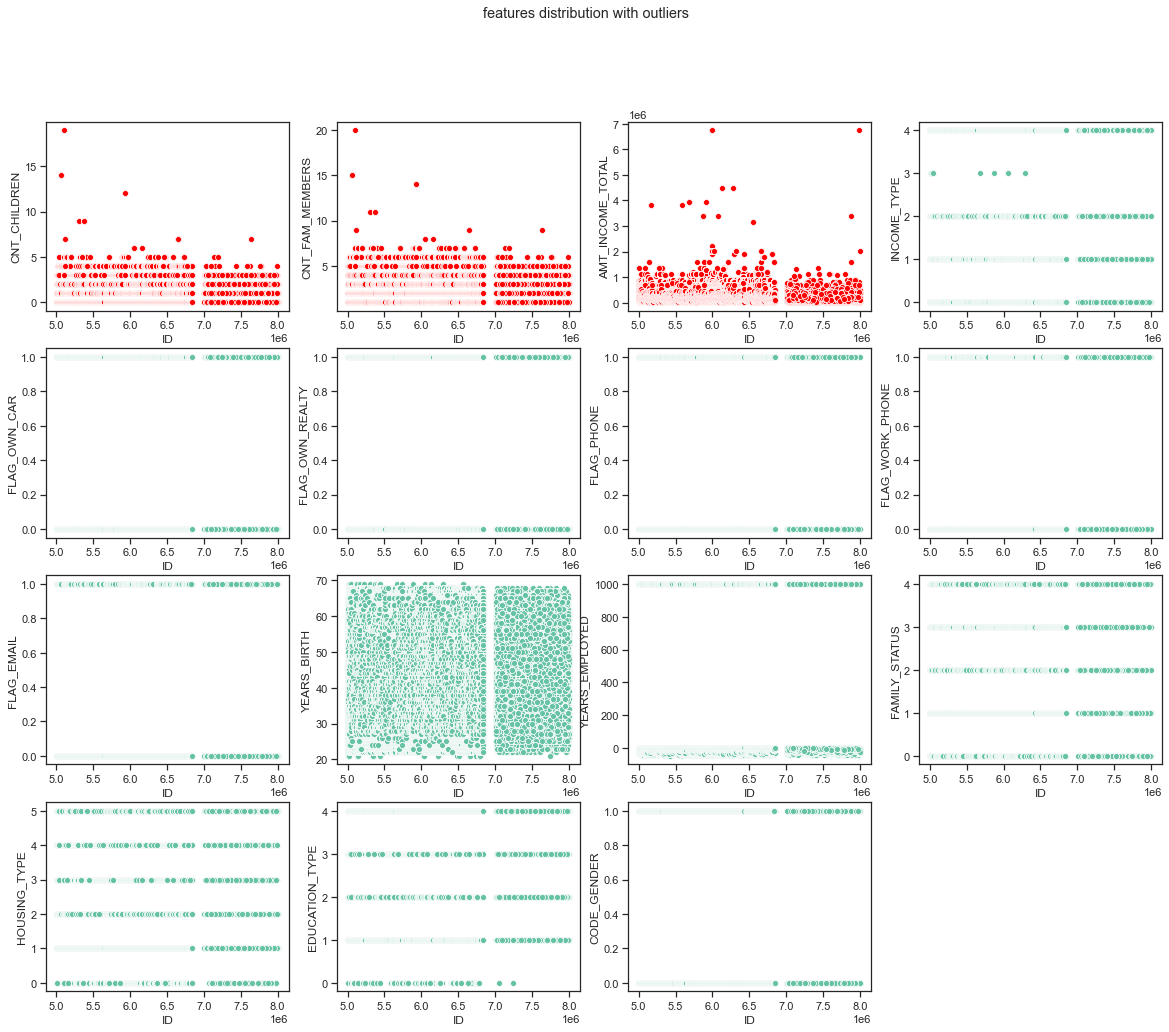

In [135]:
fig, ax= plt.subplots(nrows= 4, ncols = 4, figsize= (20,16))

sns.scatterplot(data=df_app, x='ID', y='CNT_CHILDREN', ax=ax[0][0], color= 'red')
sns.scatterplot(data=df_app, x='ID', y='CNT_FAM_MEMBERS', ax=ax[0][1], color= 'red')
sns.scatterplot(data=df_app, x='ID', y='AMT_INCOME_TOTAL', ax=ax[0][2], color='red')
sns.scatterplot(data=df_app, x='ID', y='INCOME_TYPE', ax=ax[0][3])
sns.scatterplot(data=df_app, x='ID', y='FLAG_OWN_CAR', ax=ax[1][0])
sns.scatterplot(data=df_app, x='ID', y='FLAG_OWN_REALTY', ax=ax[1][1])
sns.scatterplot(data=df_app, x='ID', y='FLAG_PHONE', ax=ax[1][2])
sns.scatterplot(data=df_app, x='ID', y='FLAG_WORK_PHONE', ax=ax[1][3])
sns.scatterplot(data=df_app, x='ID', y='FLAG_EMAIL',  ax=ax[2][0])
sns.scatterplot(data=df_app, x='ID', y='YEARS_BIRTH', ax=ax[2][1])
sns.scatterplot(data=df_app, x='ID', y='YEARS_EMPLOYED', ax=ax[2][2])
sns.scatterplot(data=df_app, x='ID', y='FAMILY_STATUS', ax=ax[2][3])
sns.scatterplot(data=df_app, x='ID', y='HOUSING_TYPE', ax=ax[3][0])
sns.scatterplot(data=df_app, x='ID', y='EDUCATION_TYPE', ax=ax[3][1])
sns.scatterplot(data=df_app, x='ID', y='CODE_GENDER', ax=ax[3][2])
ax[3][3].set_visible(False)

fig.suptitle("features distribution with outliers")


CNT_CHILDREN, CNT_FAM_MEMBERS and AMT_INCOME_TOTAL have outliers.

In [136]:
def remove_outlier(df_in, col_name):
    df_in = df_in[(df_in[col_name]>df_in[col_name].quantile(0.0001)) & 
          (df_in[col_name]<df_in[col_name].quantile(0.9999))]
    return df_in

In [137]:
df_app = remove_outlier(df_app, 'CNT_CHILDREN')
df_app = remove_outlier(df_app, 'CNT_FAM_MEMBERS')
df_app = remove_outlier(df_app, 'AMT_INCOME_TOTAL')

df_app.head()




,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS_BIRTH,YEARS_EMPLOYED,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE
24,5008834,0,0,1,1,112500.0,0,0,0,2,30,-4,4,4,3,1
25,5008835,0,0,1,1,112500.0,0,0,0,2,30,-4,4,4,3,1
26,6153712,0,0,1,1,112500.0,0,0,0,2,30,-4,4,4,3,1
27,5008836,1,1,1,3,270000.0,0,0,0,5,35,-3,4,4,1,1
28,5008837,1,1,1,3,270000.0,0,0,0,5,35,-3,4,4,1,1


Text(0.5, 0.98, 'features distribution without outliers')

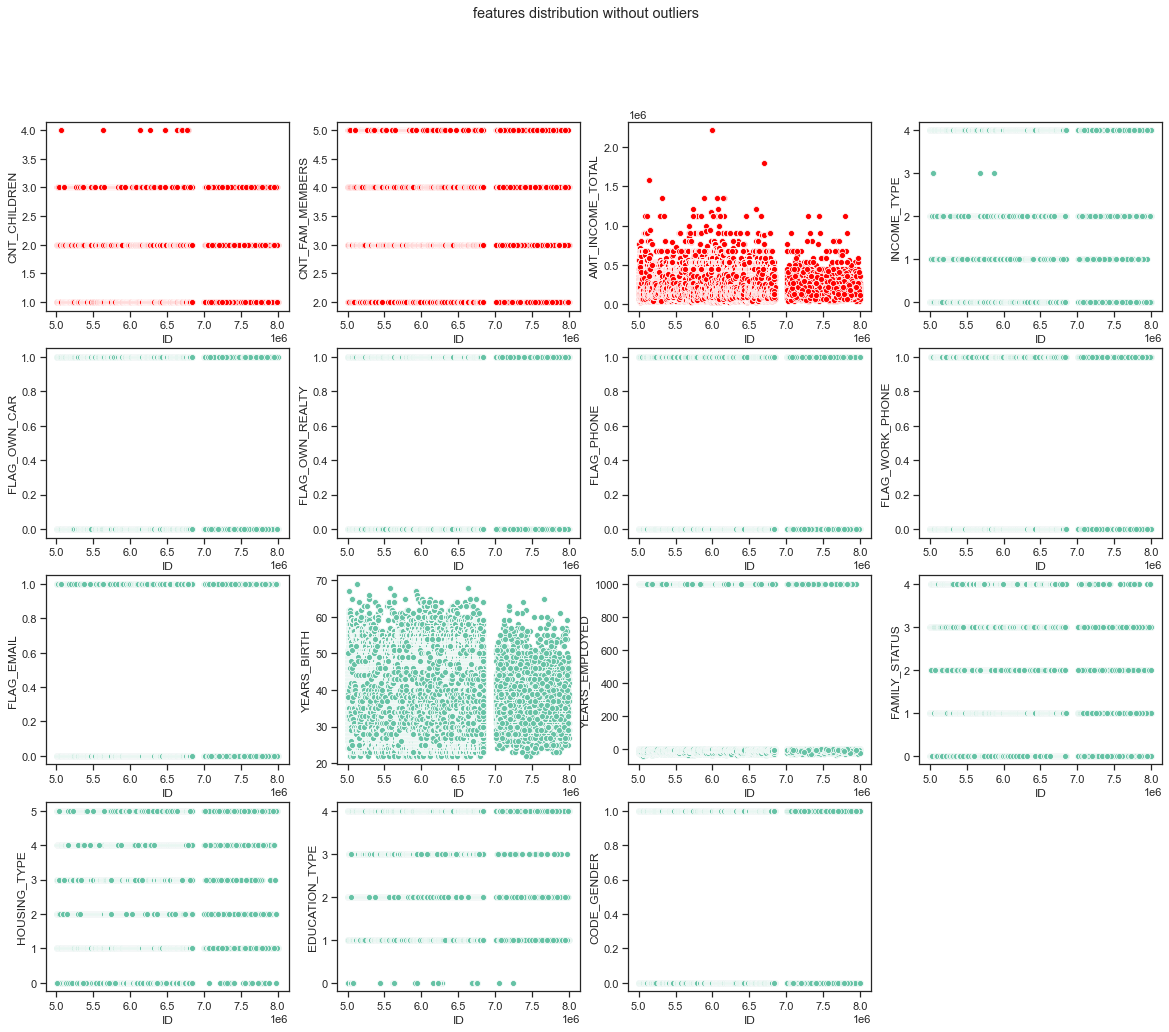

In [138]:
fig, ax= plt.subplots(nrows= 4, ncols = 4, figsize= (20,16))

sns.scatterplot(data=df_app, x='ID', y='CNT_CHILDREN', ax=ax[0][0], color= 'red')
sns.scatterplot(data=df_app, x='ID', y='CNT_FAM_MEMBERS', ax=ax[0][1], color= 'red')
sns.scatterplot(data=df_app, x='ID', y='AMT_INCOME_TOTAL', ax=ax[0][2], color='red')
sns.scatterplot(data=df_app, x='ID', y='INCOME_TYPE', ax=ax[0][3])
sns.scatterplot(data=df_app, x='ID', y='FLAG_OWN_CAR', ax=ax[1][0])
sns.scatterplot(data=df_app, x='ID', y='FLAG_OWN_REALTY', ax=ax[1][1])
sns.scatterplot(data=df_app, x='ID', y='FLAG_PHONE', ax=ax[1][2])
sns.scatterplot(data=df_app, x='ID', y='FLAG_WORK_PHONE', ax=ax[1][3])
sns.scatterplot(data=df_app, x='ID', y='FLAG_EMAIL',  ax=ax[2][0])
sns.scatterplot(data=df_app, x='ID', y='YEARS_BIRTH', ax=ax[2][1])
sns.scatterplot(data=df_app, x='ID', y='YEARS_EMPLOYED', ax=ax[2][2])
sns.scatterplot(data=df_app, x='ID', y='FAMILY_STATUS', ax=ax[2][3])
sns.scatterplot(data=df_app, x='ID', y='HOUSING_TYPE', ax=ax[3][0])
sns.scatterplot(data=df_app, x='ID', y='EDUCATION_TYPE', ax=ax[3][1])
sns.scatterplot(data=df_app, x='ID', y='CODE_GENDER', ax=ax[3][2])
ax[3][3].set_visible(False)

fig.suptitle("features distribution without outliers")


##### 2.2: Loading application csv file, droping unecessary features "credit_record.csv"
"credit_record.csv" file is loaded and processed to convert to acceptable format. It includes credit card information and status of the costumers.

In [139]:
df_rec = pd.read_csv("data/credit_record.csv", dtype='unicode')

df_rec.head(10)



,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [140]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  object
 1   MONTHS_BALANCE  1048575 non-null  object
 2   STATUS          1048575 non-null  object
dtypes: object(3)
memory usage: 24.0+ MB


The type of all the features are object, while they have numeric or categorical values. In next step we convert them to numeric values.

In [141]:
df_rec['ID'] = pd.to_numeric(df_rec['ID'] )
df_rec['MONTHS_BALANCE'] = pd.to_numeric(df_rec['MONTHS_BALANCE'])*-1

df_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [142]:
df_rec['STATUS'].value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

The meaning of each categoty of 'STATUS' feature is a follow:
<ul>
    <li> 0: 1-29 days past due </li>
    <li> 1: 30-59 days past due </li>
    <li> 2: 60-89 days overdue </li>
    <li> 3: 90-119 days overdue </li>
    <li> 4: 120-149 days overdue </li>
    <li> 5: Overdue or bad debts, write-offs for more than 150 days </li>
    <li> C: paid off that month  </li>
    <li> X: No loan for the month </li>
</ul>

We consider 'STATUS' as label, since it express the history information of the debt payment of the costumers.

We take <i>C, X and 0</i> as 0, and other flags <i>1, 2, 3, 4 and 5</i> as 1.

In [143]:

df_rec['STATUS'] = df_rec['STATUS'].replace(['X','C'],0)

df_rec['STATUS'] = df_rec['STATUS'].replace(['2','3','4','5'],1)

df_rec['STATUS'] = pd.to_numeric(df_rec['STATUS'] )



Text(0.5, 0.98, 'features distribution without outliers')

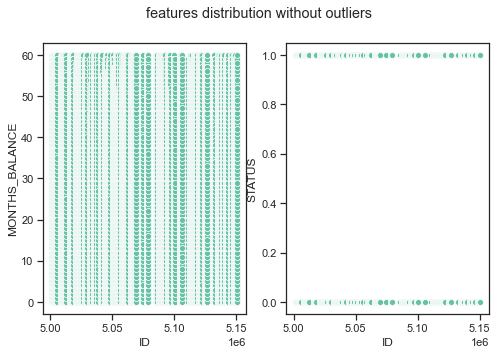

In [144]:
fig, ax= plt.subplots(nrows= 1, ncols = 2, figsize= (8,5))

sns.scatterplot(data=df_rec, x='ID', y='MONTHS_BALANCE', ax=ax[0])
sns.scatterplot(data=df_rec, x='ID', y='STATUS', ax=ax[1])

fig.suptitle("features distribution without outliers")

##### 2.3: Merging application and records dataframes


Two dataframe def_app and df_rec are merged here.

In [145]:
# merged_df = pd.concat([df_meta, credits_flattened], axis=1)
df = pd.merge(df_app, df_rec, on=['ID'], how='inner')
df.drop('ID', axis=1, inplace=True)


df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235188 entries, 0 to 235187
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CODE_GENDER       235188 non-null  int64  
 1   FLAG_OWN_CAR      235188 non-null  int64  
 2   FLAG_OWN_REALTY   235188 non-null  int64  
 3   CNT_CHILDREN      235188 non-null  int64  
 4   AMT_INCOME_TOTAL  235188 non-null  float64
 5   FLAG_WORK_PHONE   235188 non-null  int64  
 6   FLAG_PHONE        235188 non-null  int64  
 7   FLAG_EMAIL        235188 non-null  int64  
 8   CNT_FAM_MEMBERS   235188 non-null  int8   
 9   YEARS_BIRTH       235188 non-null  int64  
 10  YEARS_EMPLOYED    235188 non-null  int64  
 11  INCOME_TYPE       235188 non-null  int64  
 12  EDUCATION_TYPE    235188 non-null  int64  
 13  FAMILY_STATUS     235188 non-null  int64  
 14  HOUSING_TYPE      235188 non-null  int64  
 15  MONTHS_BALANCE    235188 non-null  int64  
 16  STATUS            23

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS_BIRTH,YEARS_EMPLOYED,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,MONTHS_BALANCE,STATUS
0,0,0,1,1,112500.0,0,0,0,2,30,-4,4,4,3,1,0,0
1,0,0,1,1,112500.0,0,0,0,2,30,-4,4,4,3,1,1,0
2,0,0,1,1,112500.0,0,0,0,2,30,-4,4,4,3,1,2,0
3,0,0,1,1,112500.0,0,0,0,2,30,-4,4,4,3,1,3,0
4,0,0,1,1,112500.0,0,0,0,2,30,-4,4,4,3,1,4,0


#### 2.4 Normalizing the features. 
Major features are pre-processed and normalized for meaningful insights into the data. This is a crucial part of ML because raw data is scaled and suitable for training machine learning models.

In [146]:
# Normalizing entire features
scaler = sklearn.preprocessing.StandardScaler()
df["AMT_INCOME_TOTAL"] = scaler.fit_transform(df["AMT_INCOME_TOTAL"].values.reshape(-1,1))
df["CNT_FAM_MEMBERS"] = scaler.fit_transform(df["CNT_FAM_MEMBERS"].values.reshape(-1,1))
df["YEARS_BIRTH"] = scaler.fit_transform(df["YEARS_BIRTH"].values.reshape(-1,1))
df["YEARS_EMPLOYED"] = scaler.fit_transform(df["YEARS_EMPLOYED"].values.reshape(-1,1))
df["INCOME_TYPE"] = scaler.fit_transform(df["INCOME_TYPE"].values.reshape(-1,1))
df["EDUCATION_TYPE"] = scaler.fit_transform(df["EDUCATION_TYPE"].values.reshape(-1,1))
df["FAMILY_STATUS"] = scaler.fit_transform(df["FAMILY_STATUS"].values.reshape(-1,1))
df["HOUSING_TYPE"] = scaler.fit_transform(df["HOUSING_TYPE"].values.reshape(-1,1))
df["MONTHS_BALANCE"] = scaler.fit_transform(df["MONTHS_BALANCE"].values.reshape(-1,1))


;

''

#### 2.5 Visualizing phase
We provide some plot to visualize the data frame and get a better sense of them.

##### Customer Gender
This plot shows number of male and female directors. 

''

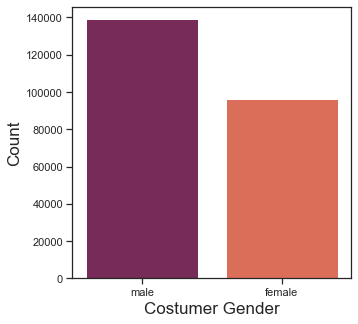

In [147]:
dfv = df['CODE_GENDER'].map({0:'male',1:'female'})
plt.figure(figsize = (5,5))
sns.countplot(dfv , palette="rocket", dodge=False)
plt.xlabel("Costumer Gender",fontsize = 17)
plt.ylabel("Count",fontsize =17)
;

##### Customer Property
This plot shows which customers own reality. 


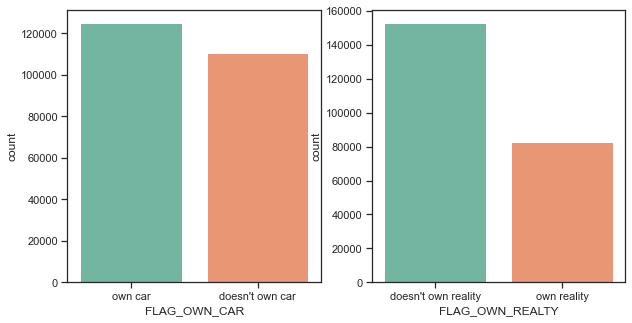

In [148]:

fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (10,5))
sns.countplot(df['FLAG_OWN_CAR'].map({0:'own car',1:"doesn't own car"}), ax=ax[0])
sns.countplot(df['FLAG_OWN_REALTY'].map({0:'own reality',1:"doesn't own reality"}), ax=ax[1])
fig.show()

##### Family status 

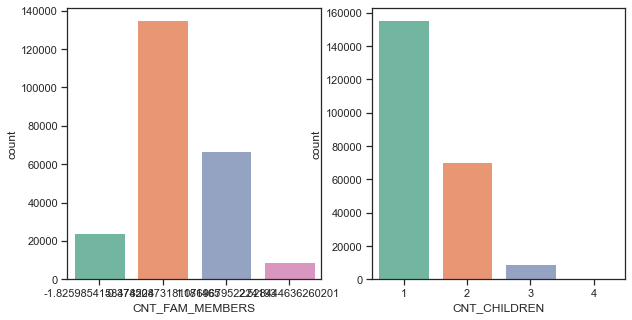

In [149]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (10,5))
sns.countplot(df['CNT_FAM_MEMBERS'], ax=ax[0])
sns.countplot(df['CNT_CHILDREN'], ax=ax[1])
fig.show()

##### Distribution of income type



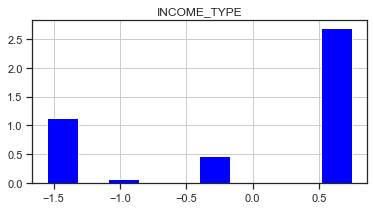

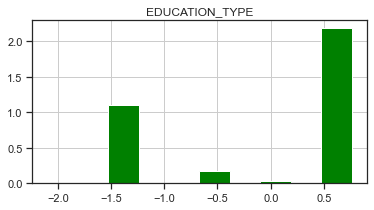

In [150]:
df.hist(column = 'INCOME_TYPE',density=True, figsize = (6,3), color="blue");
df.hist(column = 'EDUCATION_TYPE',density=True, figsize = (6,3), color="green");


##### Credit Card Status:


''

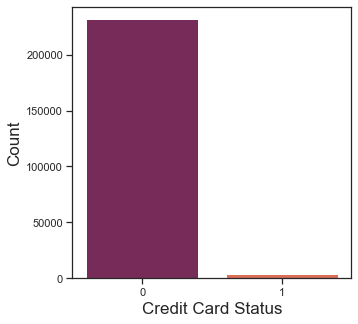

In [151]:
dfv = df['STATUS']
plt.figure(figsize = (5,5))
sns.countplot(dfv , palette="rocket", dodge=False)
plt.xlabel("Credit Card Status",fontsize = 17)
plt.ylabel("Count",fontsize =17)
;

#### correlation matrix of each feature with other feature

To understand how one feature is correlated to each other. If X is correlated with Y then, it is possible that X affects Y but necessarily always.

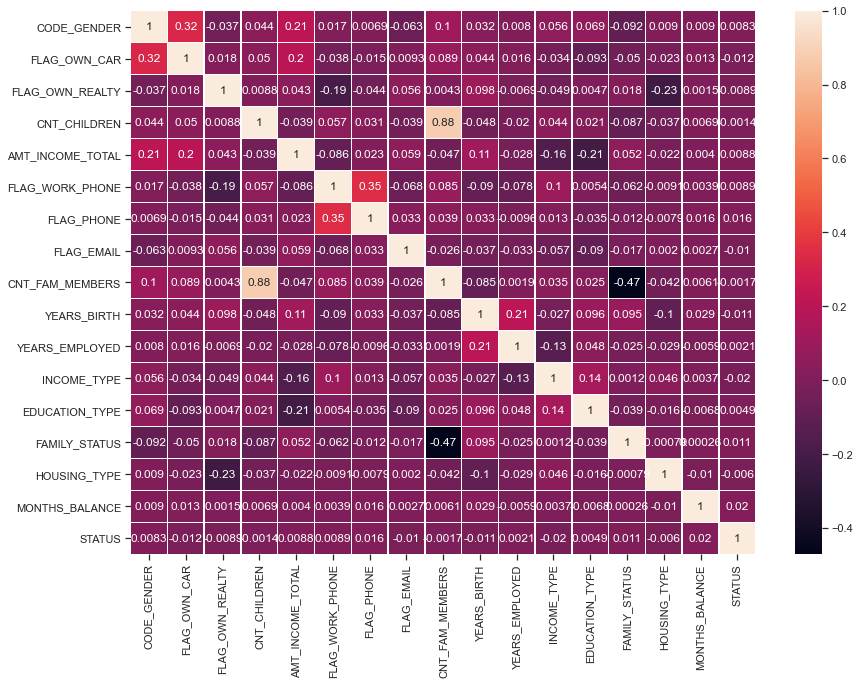

In [152]:
plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5);

### 3. phase 3:
#### Preparing X and y sets
In this section we seperate features and target columns.

##### Creating target set y and making two X datasets (one of them has AMT_INCOME_TOTAL feature the other doesn't have it)



In [153]:
X1 = df.iloc[:,0:-1] 
X2 = X1.drop('AMT_INCOME_TOTAL', axis=1)

y = df.iloc[:,-1]

print('shape of X1',X1.shape)
print('shape of X2',X2.shape)

print('shape of y',y.shape)

shape of X1 (235188, 16)
shape of X2 (235188, 15)
shape of y (235188,)


### 4. phase 4: 
#### Creating training, validating and testing dataset
In this section we create training, validating and testing dataset from X and y

Splitting data to train, test and validation which each one comprises respectively 60%, 20%, 20% of original data.
* tarining data set: X_trn, y_trn
* validating data set: X_vld, y_vld
* testing data set: X_tst, y_ts

X1 has AMT_INCOME_TOTAL feature.

In [154]:
X1_train, X1_temp, y_train, y_temp = sklearn.model_selection.train_test_split(X1, y, 
                                                                    train_size=0.6, test_size=0.4, random_state=0)
X1_val, X1_test, y_val, y_test = sklearn.model_selection.train_test_split(X1_temp, y_temp, 
                                                                    train_size=0.5, test_size=0.5, random_state=0)


X2 doesn't have AMT_INCOME_TOTAL feature.

In [155]:
X2_train, X2_temp, y_train, y_temp = sklearn.model_selection.train_test_split(X2, y, 
                                                                    train_size=0.6, test_size=0.4, random_state=0)
X2_val, X2_test, y_val, y_test = sklearn.model_selection.train_test_split(X2_temp, y_temp, 
                                                                    train_size=0.5, test_size=0.5, random_state=0)



X1 has AMT_INCOME_TOTAL feature.

In [156]:
minmax = MinMaxScaler()
smote = SMOTE()
X1_train_scaled = pd.DataFrame(minmax.fit_transform(X1_train), columns=X1_train.columns)
X1_val_scaled = pd.DataFrame(minmax.fit_transform(X1_val), columns=X1_val.columns)
X1_test_scaled = pd.DataFrame(minmax.transform(X1_test), columns=X1_test.columns)

X1_train_final, y_train_final = smote.fit_resample(X1_train_scaled, y_train)
X1_val_final, y_val_final = smote.fit_resample(X1_val_scaled, y_val)
X1_test_final, y_test_final = smote.fit_resample(X1_test_scaled, y_test)

print('shape of train set, X1_train:', X1_train_final.shape, ', y_train:', y_train_final.shape)
print('shape of validation set, X1_val:', X1_val_final.shape, ', y_val:', y_val_final.shape)
print('shape of test set, X1_test:', X1_test_final.shape, ', y_test:', y_test_final.shape)

shape of train set, X1_train: (277816, 16) , y_train: (277816,)
shape of validation set, X1_val: (92674, 16) , y_val: (92674,)
shape of test set, X1_test: (92518, 16) , y_test: (92518,)


X2 doesn't have AMT_INCOME_TOTAL feature.

In [157]:
minmax = MinMaxScaler()
smote = SMOTE()
X2_train_scaled = pd.DataFrame(minmax.fit_transform(X2_train), columns=X2_train.columns)
X2_val_scaled = pd.DataFrame(minmax.fit_transform(X2_val), columns=X2_val.columns)
X2_test_scaled = pd.DataFrame(minmax.transform(X2_test), columns=X2_test.columns)

X2_train_final, y_train_final = smote.fit_resample(X2_train_scaled, y_train)
X2_val_final, y_val_final = smote.fit_resample(X2_val_scaled, y_val)
X2_test_final, y_test_final = smote.fit_resample(X2_test_scaled, y_test)

print('shape of train set, X2_train:', X2_train_final.shape, ', y_train:', y_train_final.shape)
print('shape of validation set, X2_val:', X2_val_final.shape, ', y_val:', y_val_final.shape)
print('shape of test set, X2_test:', X2_test_final.shape, ', y_test:', y_test_final.shape)

shape of train set, X2_train: (277816, 15) , y_train: (277816,)
shape of validation set, X2_val: (92674, 15) , y_val: (92674,)
shape of test set, X2_test: (92518, 15) , y_test: (92518,)


### 5. phase 5: 
Implementing useful functions for training, testting and plotting the results of classifyers


In [158]:
def training(X_train, y_train, clf_type, param_name, param_vals, **kwargs):

    clf_list=[]
    
    for val in param_vals:
        clf = clf_type(**{param_name: val})
        clf.set_params(**kwargs)
        clf.fit(X_train, y_train)
        clf_list.append(clf)
        
    return clf_list

### Plotting Function:
plotting Confusion Matrix and accuracy score of training, validation and test sets

In [159]:
def accuracy(XX, yy, clf_list):

    accuracy_list=[]
    
    for clf in clf_list:
        
        y_pred = clf.predict(XX)
        acc = accuracy_score(yy, y_pred)
        accuracy_list.append(acc)
        
    return accuracy_list


def plotting(clf_list, param_name, param_vals, X_train_final, y_train_final, 
             X_val_final, y_val_final, X_test_final,y_test_final):
    
    accuracy_list_train =  accuracy(X_train_final, y_train_final, clf_list)
    accuracy_list_val =  accuracy(X_val_final, y_val_final, clf_list)
    accuracy_list_test =  accuracy(X_test_final, y_test_final, clf_list)
    
    
    fig, ax = plt.subplots(1,2,figsize=(14, 6))
    plt.setp(ax, xticks=np.arange(len(param_vals)), xticklabels=param_vals, xlabel=param_name, ylabel='accuracy')

    ax[0].plot(np.arange(len(param_vals)), accuracy_list_train, 'o-', color='purple', label = "train")
    ax[0].plot(np.arange(len(param_vals)), accuracy_list_val, 'o-', color='orange', label = "validate")
    ax[0].plot(np.arange(len(param_vals)), accuracy_list_test, 'k:', label = "test")


    ax[0].legend()
    ax[0].set_title("Accuracy Plot")
    ax[0].text(np.arange(len(param_vals))[-2],min(accuracy_list_test)+0.05,'train:'+str(round(accuracy_list_train[int(abs(len(accuracy_list_train)/2))],3)),color='purple')
    ax[0].text(np.arange(len(param_vals))[-2],min(accuracy_list_test)+0.025,'validate:'+str(round(accuracy_list_val[int(abs(len(accuracy_list_val)/2))],3)),color='orange')
    ax[0].text(np.arange(len(param_vals))[-2],min(accuracy_list_test),'test:'+str(round(accuracy_list_test[int(abs(len(accuracy_list_test)/2))],3)),color='k')
    
    best_est = clf_list[accuracy_list_val.index(max(accuracy_list_val))]
    cfm = sklearn.metrics.confusion_matrix(best_est.predict(X_test_final), y_test_final)
    cfm_plot = sklearn.metrics.ConfusionMatrixDisplay(cfm, display_labels=['good','bad'])
    cfm_plot.plot(ax=ax[1])
    cfm_plot.ax_.set_title("confusion matrix of "+ best_est.__class__.__name__, fontsize = 17, wrap=True, y=1.1)

    return best_est

def evaluation(X_test, y_test, clf):
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    acc = round(acc*100, 2)
    precision = round(precision*100, 2)
    recall = round(recall*100, 2)
    f1 = round(f1*100, 2)
    
    eval_list = [clf.__class__.__name__]
    eval_list.append(acc)
    eval_list.append(acc) 
    eval_list.append(precision) 
    eval_list.append(recall) 
    eval_list.append(f1) 
    
    print("-------------- Evaluation of " + str(clf.__class__.__name__) + " --------------")
    print("Accuracy = " + str(acc) + "%")
    print("Precision = " + str(precision) + "%")
    print("Recall = " + str(recall)+ "%")
    print("F1 Score = " + str(f1)+ "%")
    
    return eval_list


### 5.1 Decision Tree

X1 has AMT_INCOME_TOTAL feature.

In [160]:
dtc = training(X1_train_final, y_train_final, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [5, 10, 20, 50, 75, 100], splitter='random', random_state=0)

print("Decision Tree estimators: ")
print(dtc)

Decision Tree estimators: 
[DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=75, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=100, random_state=0, splitter='random')]


-------------- Evaluation of DecisionTreeClassifier --------------
Accuracy = 83.24%
Precision = 97.95%
Recall = 67.91%
F1 Score = 80.21%


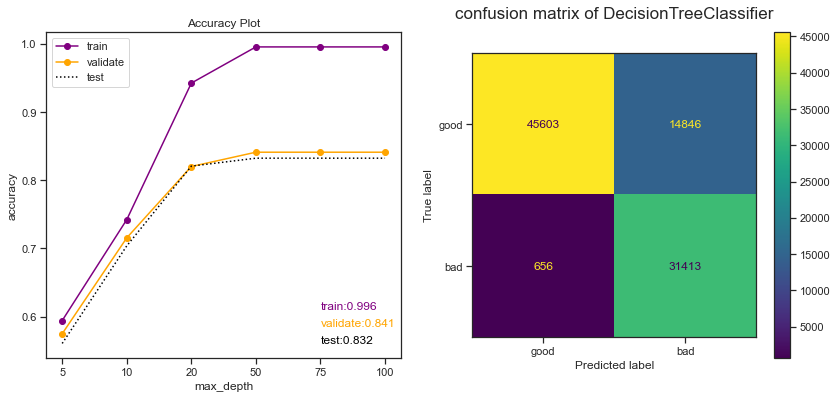

In [161]:
best_tree1 = plotting(dtc, 'max_depth', [5, 10, 20, 50, 75, 100],X1_train_final, y_train_final, 
             X1_val_final, y_val_final, X1_test_final,y_test_final)
eval_tree1 = evaluation(X1_test_final, y_test_final, best_tree1)

X2 doen't have AMT_INCOME_TOTAL feature.

In [162]:
dtc = training(X2_train_final, y_train_final, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [5, 10, 20, 50, 75, 100], splitter='random', random_state=0)

print("Decision Tree estimators: ")
print(dtc)

Decision Tree estimators: 
[DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=75, random_state=0, splitter='random'), DecisionTreeClassifier(max_depth=100, random_state=0, splitter='random')]


-------------- Evaluation of DecisionTreeClassifier --------------
Accuracy = 84.69%
Precision = 97.94%
Recall = 70.87%
F1 Score = 82.24%


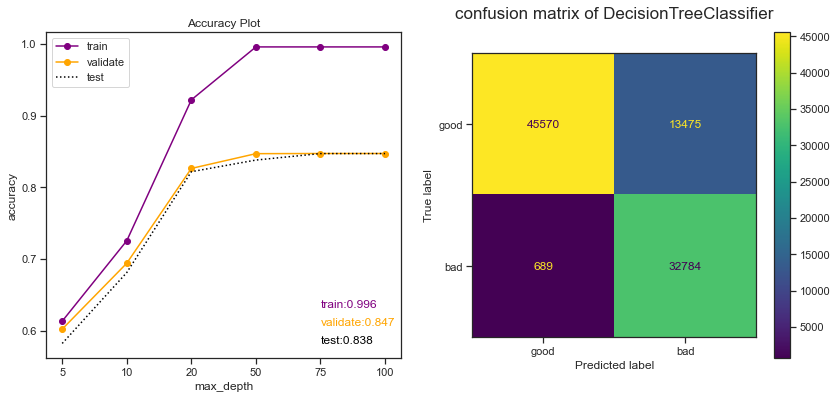

In [163]:
best_tree2 = plotting(dtc, 'max_depth', [5, 10, 20, 50, 75, 100],X2_train_final, y_train_final, 
             X2_val_final, y_val_final, X2_test_final,y_test_final)
eval_tree2 = evaluation(X2_test_final, y_test_final, best_tree2)

### 5.2 Random Forest
X1 has AMT_INCOME_TOTAL feature.


In [164]:
rf = training(X1_train_final, y_train_final,  sklearn.ensemble.RandomForestClassifier, 
                                 'max_depth', [1, 5, 15, 25 ,50 ,100], random_state=0)

print("Random Forest estimators: ")
print(rf)

Random Forest estimators: 
[RandomForestClassifier(max_depth=1, random_state=0), RandomForestClassifier(max_depth=5, random_state=0), RandomForestClassifier(max_depth=15, random_state=0), RandomForestClassifier(max_depth=25, random_state=0), RandomForestClassifier(max_depth=50, random_state=0), RandomForestClassifier(max_depth=100, random_state=0)]


-------------- Evaluation of RandomForestClassifier --------------
Accuracy = 91.25%
Precision = 98.05%
Recall = 84.18%
F1 Score = 90.59%


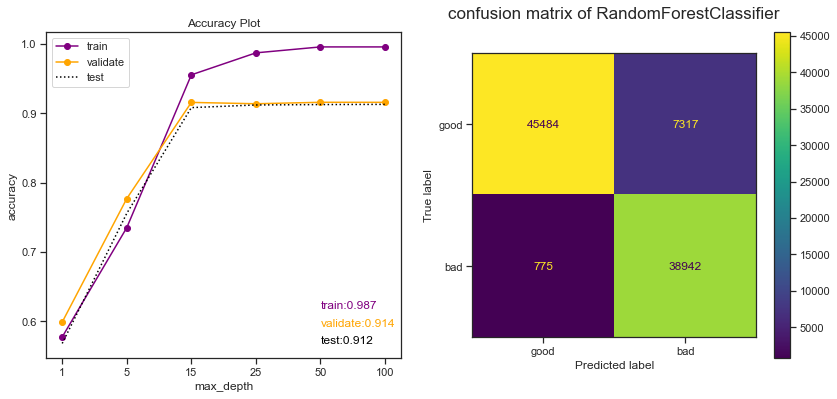

In [165]:
best_rf1 = plotting(rf, 'max_depth', [1, 5, 15, 25 ,50 ,100],X1_train_final, y_train_final, 
             X1_val_final, y_val_final, X1_test_final,y_test_final)
eval_rf1 = evaluation(X1_test_final, y_test_final, best_rf1)

X2 doesn't have AMT_INCOME_TOTAL feature.



In [166]:
rf = training(X2_train_final, y_train_final,  sklearn.ensemble.RandomForestClassifier, 
                                 'max_depth', [1, 5, 15, 25 ,50 ,100], random_state=0)

print("Random Forest estimators: ")
print(rf)

Random Forest estimators: 
[RandomForestClassifier(max_depth=1, random_state=0), RandomForestClassifier(max_depth=5, random_state=0), RandomForestClassifier(max_depth=15, random_state=0), RandomForestClassifier(max_depth=25, random_state=0), RandomForestClassifier(max_depth=50, random_state=0), RandomForestClassifier(max_depth=100, random_state=0)]


-------------- Evaluation of RandomForestClassifier --------------
Accuracy = 90.13%
Precision = 93.71%
Recall = 86.04%
F1 Score = 89.71%


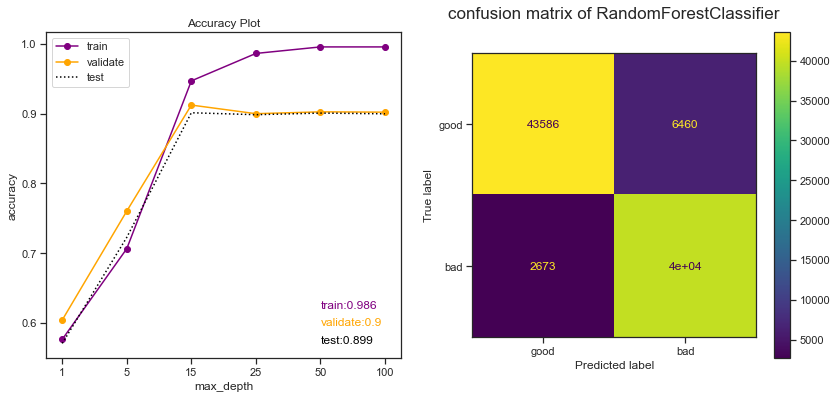

In [167]:
best_rf2 = plotting(rf, 'max_depth', [1, 5, 15, 25 ,50 ,100],X2_train_final, y_train_final, 
             X2_val_final, y_val_final, X2_test_final,y_test_final)
eval_rf2 = evaluation(X2_test_final, y_test_final, best_rf2)

### 5.3 K-Nearest Neighbors
X1 has AMT_INCOME_TOTAL feature.



In [168]:
knn = training(X1_train_final, y_train_final,  sklearn.neighbors.KNeighborsClassifier, 
                                 'n_neighbors', [50 ,100], weights='uniform')
print("K-Nearest Neighbors estimators: ")
print(knn)

K-Nearest Neighbors estimators: 
[KNeighborsClassifier(n_neighbors=50), KNeighborsClassifier(n_neighbors=100)]


In [ ]:
best_knn1 = plotting(knn, 'n_neighbors', [50, 100],X1_train_final, y_train_final, 
             X1_val_final, y_val_final, X1_test_final,y_test_final)
eval_knn1 = evaluation(X1_test_final, y_test_final, best_knn1)

X2 doesn't have AMT_INCOME_TOTAL feature.



In [ ]:
knn = training(X2_train_final, y_train_final,  sklearn.neighbors.KNeighborsClassifier, 
                                 'n_neighbors', [50 ,100], weights='uniform')
print("K-Nearest Neighbors estimators: ")
print(knn)

In [ ]:
best_knn2 = plotting(knn, 'n_neighbors', [50, 100],X2_train_final, y_train_final, 
             X2_val_final, y_val_final, X2_test_final,y_test_final)
eval_knn2 = evaluation(X2_test_final, y_test_final, best_knn2)

### 5.4 Logistic Regression
X1 has AMT_INCOME_TOTAL feature.



In [ ]:
lr = training(X1_train_final, y_train_final,  sklearn.linear_model.LogisticRegression, 
                                   'C', [0.001, 0.01, 0.5, 0.85, 0.9, 1],  
                                   random_state=0, max_iter=1000)

print("Logistic Regression estimators: ")
print(lr)

In [ ]:
best_lr1 = plotting(lr, 'C', [0.001, 0.01, 0.5, 0.85, 0.9, 1],X1_train_final, y_train_final, 
             X1_val_final, y_val_final, X1_test_final,y_test_final)
eval_lr1 = evaluation(X1_test_final, y_test_final, best_lr1)

X2 doesn't have AMT_INCOME_TOTAL feature.



In [ ]:
lr = training(X2_train_final, y_train_final,  sklearn.linear_model.LogisticRegression, 
                                   'C', [0.001, 0.01, 0.5, 0.85, 0.9, 1],  
                                   random_state=0, max_iter=1000)

print("Logistic Regression estimators: ")
print(lr)

In [ ]:
best_lr2 = plotting(lr, 'C', [0.001, 0.01, 0.5, 0.85, 0.9, 1],X2_train_final, y_train_final, 
             X2_val_final, y_val_final, X2_test_final,y_test_final)
eval_lr2 = evaluation(X2_test_final, y_test_final, best_lr2)

### 5.5 Support Vector Machine
X1 has AMT_INCOME_TOTAL feature.



In [ ]:
svm = training(X1_train_final, y_train_final,  sklearn.svm.SVC, 
                                   'C', [0.1, 10, 50, 100, 250, 350, 425, 500],  
                                  gamma=0.001, max_iter=1000, random_state=0)

print("SVM estimators: ")
print(svm)

In [ ]:
best_svm1 = plotting(svm, 'C', [0.1, 10, 50, 100, 250, 350, 425, 500],X1_train_final, y_train_final, 
             X1_val_final, y_val_final, X1_test_final,y_test_final)
eval_svm1 = evaluation(X1_test_final, y_test_final, best_svm1)

X2 doesn't have AMT_INCOME_TOTAL feature.



In [ ]:
svm = training(X2_train_final, y_train_final,  sklearn.svm.SVC, 
                                   'C', [0.1, 10, 50, 100, 250, 350, 425, 500],  
                                  gamma=0.001, max_iter=1000, random_state=0)

print("SVM estimators: ")
print(svm)

In [ ]:
best_svm2 = plotting(svm, 'C', [0.1, 10, 50, 100, 250, 350, 425, 500],X2_train_final, y_train_final, 
             X2_val_final, y_val_final, X2_test_final,y_test_final)
eval_svm2 = evaluation(X2_test_final, y_test_final, best_svm2)

### 5.6 Neural Network MLPerceptron Model
X1 has AMT_INCOME_TOTAL feature.



In [ ]:
nnp = training(X1_train_final, y_train_final,  sklearn.neural_network.MLPClassifier, 
                                  'batch_size', [200, 250, 300, 350, 400, 450, 500], 
                                   random_state=0, hidden_layer_sizes=(30,20), solver='adam',
                                   learning_rate_init=0.09,momentum=0.9)

print("Neural Network estimators: ")
print(nnp)

In [ ]:
best_nnp1 = plotting(nnp, 'batch_size', [200, 250, 300, 350, 400, 450, 500],X1_train_final, y_train_final, 
             X1_val_final, y_val_final, X1_test_final,y_test_final)
eval_nnp1 = evaluation(X1_test_final, y_test_final, best_nnp1)

X2 doesn't have AMT_INCOME_TOTAL feature.



In [ ]:
nnp = training(X2_train_final, y_train_final,  sklearn.neural_network.MLPClassifier, 
                                  'batch_size', [200, 250, 300, 350, 400, 450, 500], 
                                   random_state=0, hidden_layer_sizes=(30,20), solver='adam',
                                   learning_rate_init=0.09,momentum=0.9)

print("Neural Network estimators: ")
print(nnp)

In [ ]:
best_nnp2 = plotting(nnp, 'batch_size', [200, 250, 300, 350, 400, 450, 500],X2_train_final, y_train_final, 
             X2_val_final, y_val_final, X2_test_final,y_test_final)
eval_nnp2 = evaluation(X2_test_final, y_test_final, best_nnp2)

## 6. Evaluation Overview

In [ ]:
def creating_row(eval_list):
    
    keys = ["Estimator", "Accuracy", "Precision", "Recall", "F1_Score"]
    row_dict = dict(zip(keys, eval_list))
    
    return row_dict
    

pd_data = {'Estimator': [], 
           'Accuracy': [], 
           'Precision': [],  
           'Recall': [], 
           'F1_Score': []}
df = pd.DataFrame(pd_data)

df = df.append(creating_row(eval_tree1), ignore_index=True)           
df = df.append(creating_row(eval_tree2), ignore_index=True)           

df = df.append(creating_row(eval_rf1), ignore_index=True) 
df = df.append(creating_row(eval_rf2), ignore_index=True) 

df = df.append(creating_row(eval_knn1), ignore_index=True)         
df = df.append(creating_row(eval_knn2), ignore_index=True)         

df = df.append(creating_row(eval_lr1), ignore_index=True)
df = df.append(creating_row(eval_lr2), ignore_index=True)

df = df.append(creating_row(eval_svm1), ignore_index=True)       
df = df.append(creating_row(eval_svm2), ignore_index=True)       

df = df.append(creating_row(eval_nnp1), ignore_index=True) 
df = df.append(creating_row(eval_nnp2), ignore_index=True) 

df